In [1]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Masking
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

print("TensorFlow version:", tf.__version__)


2025-10-27 22:13:56.573036: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-27 22:13:56.683505: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-27 22:14:00.368138: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-27 22:14:07.925365: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

TensorFlow version: 2.20.0


2025-10-28 04:21:58.382616: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-28 04:21:58.396003: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-28 04:21:58.836276: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-28 04:22:01.224286: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

TF: 2.20.0
Pandas: 2.2.2
Rows: 35811
Example row:


,id,20_labels,21_labels,22_labels,Blue,Green,Red,NIR,BAI,EVI,GEMI,NDVI,NDWI,Dates
0,1,nb,nb,nb,"[0.05700000002980232, 0.03500000014901161, 0.0...","[0.054999999701976776, 0.039000000804662704, 0...","[0.0430000014603138, 0.027000000700354576, 0.0...","[0.09300000220537186, 0.08399999886751175, 0.0...","[2.2880001068115234, 1.7109999656677246, 2.272...","[0.13600000739097595, 0.14399999380111694, 0.1...","[0.5139999985694885, 0.5509999990463257, 0.460...","[0.25600001215934753, 0.3619999885559082, 0.26...","[0.3709999918937683, 0.5109999775886536, 0.361...","[20200110, 20200115, 20200120, 20200131, 20200..."


/tmp/ipykernel_23071/793427660.py:62: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'nb': 0, 'pb': 0, 'tb': 1})


X shape: (35811, 235, 9)
y distribution: {0: 33729, 1: 2082}
Splits -> train: (25067, 235, 9) val: (5372, 235, 9) test: (5372, 235, 9)
class_weight: {0: np.float64(0.530855569673867), 1: np.float64(8.602264927934112)}


/home/jovyan/.local/lib/python3.11/site-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
E0000 00:00:1761625515.760740   23071 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1761625515.777481   23071 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking (Masking)               │ (None, 235, 9)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │        70,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,489 (310.50 KB)

 Trainable params: 79,233 (309.50 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/50


2025-10-28 04:25:20.543444: E tensorflow/core/util/util.cc:131] oneDNN supports DT_BOOL only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


392/392 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.8243 - auc: 0.9124 - loss: 0.3730
Epoch 1: val_auc improved from None to 0.96532, saving model to lstm_best.keras
392/392 ━━━━━━━━━━━━━━━━━━━━ 110s 268ms/step - accuracy: 0.8685 - auc: 0.9455 - loss: 0.3001 - val_accuracy: 0.9585 - val_auc: 0.9653 - val_loss: 0.1556 - learning_rate: 0.0010
Epoch 2/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.9211 - auc: 0.9743 - loss: 0.2034
Epoch 2: val_auc improved from 0.96532 to 0.98910, saving model to lstm_best.keras
392/392 ━━━━━━━━━━━━━━━━━━━━ 97s 247ms/step - accuracy: 0.9318 - auc: 0.9772 - loss: 0.1912 - val_accuracy: 0.8673 - val_auc: 0.9891 - val_loss: 0.2784 - learning_rate: 0.0010
Epoch 3/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.9345 - auc: 0.9813 - loss: 0.1716
Epoch 3: val_auc improved from 0.98910 to 0.99021, saving model to lstm_best.keras
392/392 ━━━━━━━━━━━━━━━━━━━━ 97s 247ms/step - accuracy: 0.9408 - auc: 0.9835 - loss: 0.1607 - val_accuracy

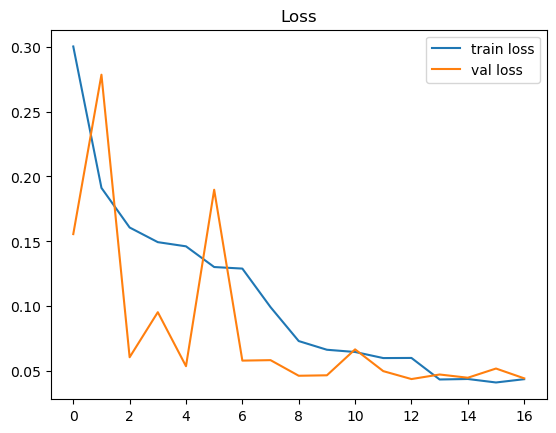

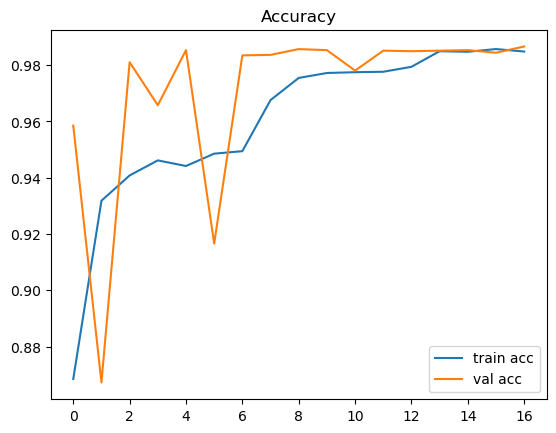

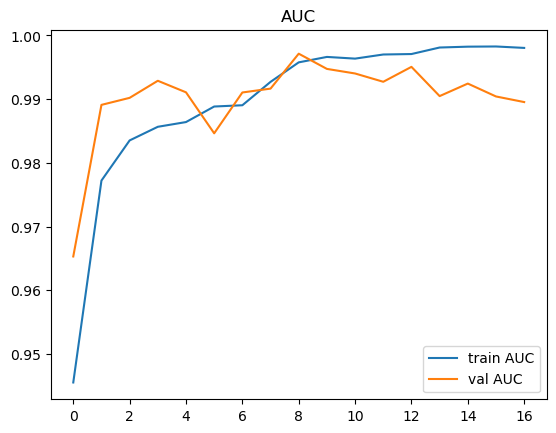

Saved normalization parameters to lstm_feature_norm.csv
Best model saved to lstm_best.keras


In [1]:
# ============================================================
# 0) Setup
# ============================================================
import os, ast, math, numpy as np, pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Masking
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

print("TF:", tf.__version__)
print("Pandas:", pd.__version__)

# Make results reproducible
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)


# ============================================================
# 1) Load organized.csv and parse list columns
#    Your table columns: id, 20_labels, 21_labels, 22_labels, Blue, Green, Red, NIR, BAI, EVI, GEMI, NDVI, NDWI, Dates
# ============================================================
input_file = "organized_highres.csv"   # change if needed
df = pd.read_csv(input_file)

list_cols = ["Blue","Green","Red","NIR","BAI","EVI","GEMI","NDVI","NDWI","Dates"]
for col in list_cols:
    df[col] = df[col].apply(ast.literal_eval)

# Sanity checks
print("Rows:", len(df))
print("Example row:")
display(df.head(1))

# ============================================================
# 2) Build features X (time x features) and labels y
#    - Each row -> tensor shape (T=1095, F=9)
#    - Labels: 22_labels -> {'nb':0, 'pb':0, 'tb':1}
# ============================================================
bands = ["Blue","Green","Red","NIR","BAI","EVI","GEMI","NDVI","NDWI"]

# Ensure all samples share same length T
T = len(df.iloc[0]["Dates"])
assert all(len(df.iloc[i]["Dates"]) == T for i in range(len(df))), "Inconsistent time length across rows."

def row_to_tensor(row):
    # stack bands -> shape (9, T), then transpose to (T, 9)
    arr = np.array([row[b] for b in bands], dtype=np.float32)  # (9, T)
    return arr.T  # (T, 9)

X = np.stack([row_to_tensor(df.iloc[i]) for i in range(len(df))], axis=0)  # (N, T, 9)

# Labels
y = (
    df["22_labels"]
      .replace({'nb': 0, 'pb': 0, 'tb': 1})
      .astype(int)
      .values
)

print("X shape:", X.shape)   # (N, 1095, 9)
print("y distribution:", pd.Series(y).value_counts().to_dict())

# ============================================================
# 3) Train/Val/Test split (stratified on y)
# ============================================================
X_train, X_tmp, y_train, y_tmp = train_test_split(
    X, y, test_size=0.30, random_state=SEED, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_tmp, y_tmp, test_size=0.50, random_state=SEED, stratify=y_tmp
)

print("Splits ->",
      "train:", X_train.shape, 
      "val:", X_val.shape, 
      "test:", X_test.shape)

# ============================================================
# 4) Normalize features
#    We'll do z-score per feature across the TRAIN set (flatten over time and samples),
#    then apply the same mean/std to val/test.
# ============================================================
# Compute mean/std for each feature (9) based on training data
# Flatten (N*T, F)
train_flat = X_train.reshape(-1, X_train.shape[-1])
feat_mean = train_flat.mean(axis=0)
feat_std  = train_flat.std(axis=0)
feat_std[feat_std == 0] = 1.0  # avoid division by zero

def normalize(x):
    return (x - feat_mean) / feat_std

X_train = normalize(X_train)
X_val   = normalize(X_val)
X_test  = normalize(X_test)

# ============================================================
# 5) Class imbalance handling via class_weight
# ============================================================
classes = np.array([0,1])
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)
class_weight_dict = {int(c): w for c, w in zip(classes, class_weights)}
print("class_weight:", class_weight_dict)

# ============================================================
# 6) Build LSTM model
# ============================================================
T, F = X_train.shape[1], X_train.shape[2]

model = Sequential([
    Masking(mask_value=0.0, input_shape=(T, F)),  # in case of exact zeros; harmless otherwise
    LSTM(128, return_sequences=False),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
)
model.summary()

# ============================================================
# 7) Train with callbacks (early stopping, lr schedule, best checkpoint)
# ============================================================
callbacks = [
    EarlyStopping(monitor="val_auc", mode="max", patience=8, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_auc", mode="max", factor=0.5, patience=4, verbose=1, min_lr=1e-5),
    ModelCheckpoint("lstm_best.keras", monitor="val_auc", mode="max", save_best_only=True, verbose=1)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

# ============================================================
# 8) Evaluate on test
# ============================================================
test_proba = model.predict(X_test).ravel()
test_pred  = (test_proba >= 0.5).astype(int)

print("Test accuracy:", accuracy_score(y_test, test_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, test_proba))

print("\nClassification report:\n", classification_report(y_test, test_pred, digits=4))
print("\nConfusion matrix:\n", confusion_matrix(y_test, test_pred))

# ============================================================
# 9) (Optional) Plot training curves
# ============================================================
plt.figure()
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.title("Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.title("Accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["auc"], label="train AUC")
plt.plot(history.history["val_auc"], label="val AUC")
plt.title("AUC")
plt.legend()
plt.show()

# ============================================================
# 10) Save scalers + model inference helper (optional)
# ============================================================
# Save feature normalization parameters and a tiny helper function as notes
norm_info = pd.DataFrame({"feature": bands, "mean": feat_mean, "std": feat_std})
norm_info.to_csv("lstm_feature_norm.csv", index=False)
print("Saved normalization parameters to lstm_feature_norm.csv")
print("Best model saved to lstm_best.keras")
